In [1]:
#imports
import librosa
import librosa.display
import librosa.feature
import numpy 
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import pandas as pd
import os
import IPython.display as ipd  # To play sound in the notebook

We Find the following things and then maybe use them in future to predict emotions I believe..
- Root Mean Square Energy
- Zero Crossing Rate,Spectrogram,Mel Spectrogram
- Spectral Centroid
- Spectral Bandwidth
- Spectral Contrast
- Spectral Rolloff
- chroma vector
- Constant-Q Transform
- MFCC

In [2]:
#We focus on Only 1 audio as of Now and that is ../input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav

In [3]:
x, sr = librosa.load('../input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav')

In [4]:
x.shape#array length

(38084,)

In [5]:
sr#sample_Rate

22050

In [6]:
librosa.get_duration(x) #length of audio

1.7271655328798186

In [7]:
ipd.Audio('../input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav') # load a local WAV file

Text(0.5, 1.0, 'Mono')

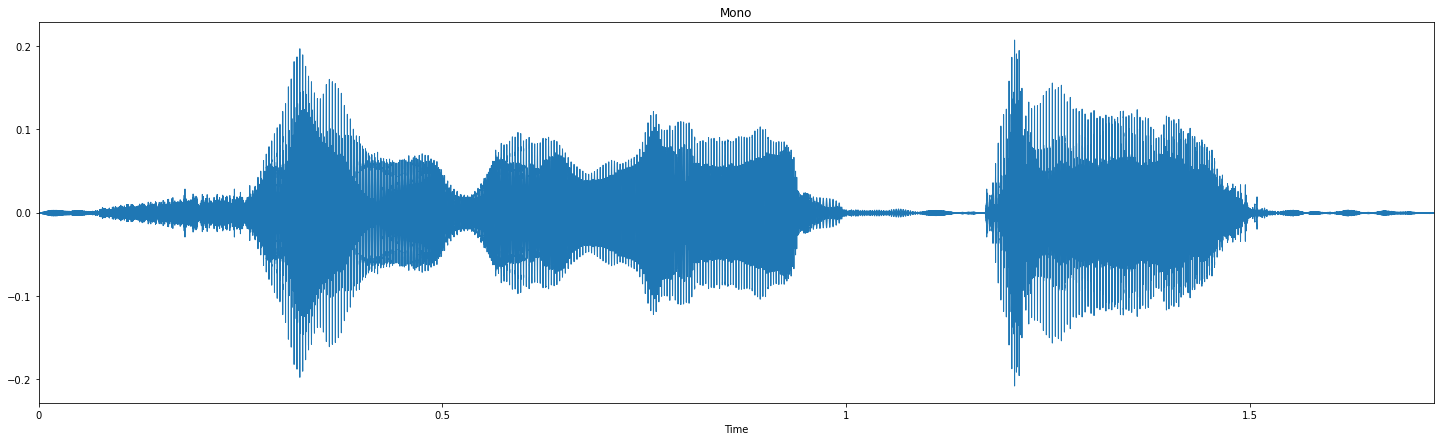

In [8]:
plt.figure(figsize=(25,7))
librosa.display.waveplot(x, sr=sr,x_axis='time',offset=0)#max sample rate and maxpoints to plot can be specified too
plt.title('Mono')

In [9]:
#Root mean square value
rms=librosa.feature.rms(y=x)
rms

array([[0.00229211, 0.00215993, 0.00211157, 0.00251368, 0.0031077 ,
        0.00400231, 0.00517855, 0.00614355, 0.00689133, 0.00755708,
        0.01223721, 0.02283943, 0.04011514, 0.0560139 , 0.06430994,
        0.06709661, 0.0616552 , 0.05056204, 0.04218494, 0.03747382,
        0.03501404, 0.03139427, 0.02770428, 0.02798084, 0.03180939,
        0.03713094, 0.04175619, 0.03993805, 0.03645238, 0.03486064,
        0.03387884, 0.03991595, 0.04516451, 0.04771437, 0.04872266,
        0.04603438, 0.04402857, 0.04327373, 0.04365199, 0.04050848,
        0.03494376, 0.0274067 , 0.0147282 , 0.00691477, 0.00419811,
        0.00205105, 0.00213679, 0.00207772, 0.00170733, 0.00557241,
        0.02628756, 0.04632271, 0.05238758, 0.05932173, 0.05956268,
        0.05227581, 0.0534936 , 0.05190939, 0.05077448, 0.05051855,
        0.04741084, 0.04352858, 0.03727962, 0.02817683, 0.01928284,
        0.00947457, 0.00465847, 0.0017676 , 0.00170303, 0.00138924,
        0.00143103, 0.00149522, 0.00119291, 0.00

In [10]:
rms.shape#so this has 75 points for 1.712 length of audio

(1, 75)

In [11]:
#Zero crossing rate
zcr=librosa.feature.zero_crossing_rate(x)
zcr

array([[0.        , 0.03173828, 0.13671875, 0.25146484, 0.37060547,
        0.47753906, 0.49023438, 0.52392578, 0.546875  , 0.55419922,
        0.46923828, 0.33056641, 0.20166016, 0.06787109, 0.04736328,
        0.04931641, 0.04833984, 0.05371094, 0.04980469, 0.04785156,
        0.04150391, 0.03076172, 0.02929688, 0.02636719, 0.03271484,
        0.03955078, 0.04394531, 0.04638672, 0.04052734, 0.03320312,
        0.02880859, 0.03125   , 0.03222656, 0.04248047, 0.04882812,
        0.05078125, 0.05419922, 0.04541016, 0.04199219, 0.03613281,
        0.03076172, 0.02929688, 0.02832031, 0.02880859, 0.02978516,
        0.02832031, 0.01953125, 0.01855469, 0.01220703, 0.01171875,
        0.03125   , 0.0390625 , 0.05566406, 0.06982422, 0.06884766,
        0.07128906, 0.07373047, 0.07177734, 0.07324219, 0.078125  ,
        0.08300781, 0.08837891, 0.08789062, 0.08154297, 0.06689453,
        0.04638672, 0.03613281, 0.04003906, 0.0390625 , 0.05273438,
        0.05078125, 0.03076172, 0.02246094, 0.00

In [12]:
zcr.shape#(this also has 75 points of data)

(1, 75)

In [13]:
chroma_stft = librosa.feature.chroma_stft(y=x, sr=sr,n_chroma=12, n_fft=4096)
chroma_stft.shape

(12, 75)

In [14]:
chroma_stft[0]
#chroma_stft[1]
#chroma_stft[2]

array([0.872463  , 0.36884174, 0.26400912, 0.34893572, 0.49926943,
       0.601345  , 0.5960075 , 0.600668  , 0.6599845 , 0.64511335,
       0.09681074, 0.08356538, 0.18454236, 0.3497914 , 0.63128304,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.6838917 , 0.20118374,
       0.08446316, 0.05371696, 0.08414428, 0.15928137, 0.2100409 ,
       0.16111049, 0.08614328, 0.04136576, 0.01840327, 0.0130831 ,
       0.01321851, 0.01203863, 0.00810285, 0.00994199, 0.02825302,
       0.0687624 , 0.15054892, 0.37382823, 0.3173164 , 0.41235173,
       0.1826732 , 0.00650652, 0.01082318, 0.06773619, 0.02201381,
       0.02759553, 0.06082442, 0.14546524, 0.38695732, 0.43462387,
       0.37697172, 0.37071058, 0.29697642, 0.17766154, 0.15370552,
       0.32489663, 0.53536505, 0.55170524, 0.46687096, 0.2764551 ,
       0.0893306 , 0.11437708, 0.14815529, 0.21055534, 0.27519828,
       0.2673462 , 0.31603593, 0.38830167, 0.57841545, 0.95882

In [15]:
chroma_cqt = librosa.feature.chroma_cqt(y=x, sr=sr, n_chroma=12)
chroma_cqt 
#this also can produce those 12 features or n=more

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.91570302, 0.46688083, 0.07188574, 0.14856161, 0.33030253,
        0.77287571, 1.        , 1.        , 0.98631843, 0.80249962,
        0.65456482, 0.79330895, 1.        , 1.        , 0.36041621,
        0.04559758, 0.04725421, 0.03871491, 0.26403728, 0.41281133,
        0.19642273, 0.09928788, 0.05590626, 0.07491829, 0.06432479,
        0.02197504, 0.03391658, 0.04672216, 0.04693403, 0.04709692,
        0.34978779, 0.90756844, 0.79344335, 1.        , 0.65544043,
        0.8570491 , 1.        , 1.        , 1.        , 1.        ,
        0.98023273, 0.32908913, 0.13777255, 0.46852946, 0.91577183,
        0.71187104, 0.73849358, 0.56056348, 0.14173466, 0.08801665,
        0.2636082 , 0.54867896, 0.57138876, 0.17114078, 0.40899773,
        0.71794259, 0.58534598, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.  

In [16]:
#13 mfcc features
mfcc_full=librosa.feature.mfcc(y=x, sr=sr,n_mfcc=12)

In [17]:
mfcc_full.shape

(12, 75)

In [18]:
mfcc_full[0] #first 75 features like wise can be done for all other
#mfcc_Full[1]
#mfcc_full[2]

array([-677.2332 , -675.87317, -600.7658 , -502.476  , -447.7669 ,
       -431.79114, -424.62842, -414.86096, -401.05603, -387.44937,
       -367.61362, -329.8824 , -312.58594, -283.74188, -285.59818,
       -301.84302, -329.50568, -348.67838, -363.70392, -375.63278,
       -384.50116, -385.38684, -401.30402, -398.56732, -358.57077,
       -356.8855 , -370.559  , -397.33383, -426.45526, -463.35477,
       -477.7436 , -475.72577, -441.56747, -398.29007, -385.03244,
       -394.68372, -396.74606, -387.01865, -387.0765 , -383.00754,
       -371.57538, -433.58142, -545.6407 , -597.7789 , -621.3669 ,
       -651.75854, -655.3672 , -663.4853 , -671.7371 , -617.7082 ,
       -378.90393, -281.64883, -252.30345, -258.1634 , -287.36392,
       -295.22934, -294.0879 , -283.0883 , -284.439  , -290.58908,
       -282.73135, -290.66794, -281.3866 , -298.75473, -337.88712,
       -400.63864, -530.83606, -643.50226, -632.1413 , -610.2991 ,
       -611.6684 , -629.6746 , -650.2155 , -667.8025 , -672.32

In [19]:
#spectral_Centroid
spectral_cent = librosa.feature.spectral_centroid(y=x, sr=sr)
spectral_cent#it has 75 values too

array([[ 853.36975196,  999.72840235, 3432.34114482, 4945.35086758,
        5478.24145403, 5896.84464002, 6135.87389019, 6209.47022491,
        6348.9860958 , 6312.58156825, 6140.19277622, 4800.91142338,
        2842.81614152, 2175.51116729, 1902.4737304 , 1710.5425528 ,
        1693.50881557, 1838.0764675 , 1966.44280857, 1929.94482718,
        1864.79308886, 1665.79362415, 1841.15009619, 2101.75022672,
        1724.83014077, 1802.52401137, 1728.49516649, 1359.99413337,
        1080.13856301,  969.25205635,  894.23751814,  829.4179839 ,
         949.93865525, 1116.12838389, 1242.77542869, 1351.72754316,
        1426.99681983, 1506.86111618, 1597.8883588 , 1580.12041122,
        1399.79230975, 1176.24615761,  639.52383722,  497.07169144,
         907.93322776,  954.36019918,  828.44554238,  907.08288212,
         963.88982343, 1596.96668183, 1598.88654716, 1498.09808629,
        1434.50967152, 1504.02297088, 1782.15832091, 1877.08978469,
        2031.13173759, 1786.22216066, 1660.28567

In [20]:
spectral_bw = librosa.feature.spectral_bandwidth(y=x, sr=sr)
spectral_bw

array([[2268.3033045 , 2324.12555911, 3224.34425479, 2826.79700315,
        2510.13586121, 2499.62442709, 2503.92339504, 2502.33644682,
        2432.45309878, 2311.0538117 , 2471.80841277, 3219.2386849 ,
        3064.7560835 , 2570.22455141, 2306.17277466, 2186.15948427,
        2235.17728895, 2374.79044386, 2505.9141118 , 2501.94728324,
        2546.1313347 , 2462.64005058, 2752.82767552, 3025.26183628,
        2607.6044716 , 2588.6961476 , 2498.22293915, 2178.26906554,
        1903.64434843, 1803.45034568, 1766.42129871, 1588.89577947,
        1598.64004561, 1787.04987004, 1901.23586079, 2031.73441627,
        2198.55095021, 2185.82231528, 2253.81586328, 2187.33970356,
        1913.97885672, 1655.48893863, 1145.09877473, 1193.67226169,
        1901.34818452, 2076.74091012, 2010.1701767 , 2184.13141315,
        2339.02240853, 2619.79060488, 2232.80347008, 1951.94578007,
        1729.1953495 , 1740.984599  , 2102.24993082, 2279.83427663,
        2437.4380106 , 2166.44856002, 2016.57869

In [21]:
spectral_flatness = librosa.feature.spectral_flatness(y=x)
spectral_flatness

array([[5.77756546e-05, 1.41463985e-04, 5.37756830e-03, 1.00899011e-01,
        1.85726106e-01, 1.74786434e-01, 1.57326415e-01, 1.26976117e-01,
        1.23077735e-01, 1.44523844e-01, 1.49412930e-01, 4.60298285e-02,
        6.62720064e-03, 3.15254182e-03, 1.39927585e-03, 9.07011214e-04,
        6.31684670e-04, 7.63215474e-04, 9.77079966e-04, 9.35216551e-04,
        6.79877412e-04, 6.16029953e-04, 1.41315663e-03, 2.57713115e-03,
        1.36204401e-03, 7.29434949e-04, 4.55320172e-04, 2.10206956e-04,
        1.52983223e-04, 1.18240707e-04, 6.86195126e-05, 4.66409474e-05,
        6.69360743e-05, 1.21464007e-04, 1.77625028e-04, 1.78193019e-04,
        2.01244387e-04, 3.09216644e-04, 3.47320660e-04, 3.02062632e-04,
        3.67298926e-04, 2.94658501e-04, 4.84675220e-05, 6.14471865e-05,
        3.33234872e-04, 2.48630677e-04, 1.62794473e-04, 1.52827139e-04,
        1.22696452e-04, 3.22366878e-03, 7.07793981e-03, 2.30982038e-03,
        1.18689879e-03, 1.60278927e-03, 1.38158025e-03, 1.477102

In [22]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr)
spectral_rolloff

array([[ 796.72851562, 2734.71679688, 7407.421875  , 8397.94921875,
        8419.48242188, 8602.51464844, 8720.94726562, 8645.58105469,
        8591.74804688, 8451.78222656, 8441.015625  , 8290.28320312,
        7299.75585938, 5103.36914062, 3671.41113281, 3046.94824219,
        3294.58007812, 4091.30859375, 5189.50195312, 4091.30859375,
        4091.30859375, 3779.07714844, 5544.79980469, 6632.2265625 ,
        4909.5703125 , 5189.50195312, 4866.50390625, 2304.05273438,
        1098.19335938,  947.4609375 ,  861.328125  ,  872.09472656,
         925.92773438, 1162.79296875, 1464.2578125 , 1754.95605469,
        1765.72265625, 1808.7890625 , 1841.08886719, 1927.22167969,
        1841.08886719, 1798.02246094, 1464.2578125 ,  398.36425781,
         732.12890625,  732.12890625,  441.43066406,  882.86132812,
        1798.02246094, 4328.17382812, 3402.24609375, 2476.31835938,
        2336.35253906, 2293.28613281, 2562.45117188, 2939.28222656,
        4705.00488281, 2627.05078125, 2034.88769

In [23]:
import csv

In [24]:
pip install spafe

     |████████████████████████████████| 77 kB 186 kB/s 
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [25]:
import scipy
from spafe.utils import vis
from spafe.features.gfcc import gfcc

In [26]:
pwd()

'/kaggle/working'

In [27]:
# init input vars
num_ceps = 13
low_freq = 0
high_freq = 2000
nfilts = 24
nfft = 512
dct_type = 2,
use_energy = False,
lifter = 5
normalize = False

In [28]:
# read wav 
fs, sig = scipy.io.wavfile.read("../input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav")

In [29]:
# compute features
gfccs = gfcc(sig=x,
             fs=sr,
             num_ceps=num_ceps,
             nfilts=nfilts,
             nfft=nfft,
             low_freq=low_freq,
             high_freq=high_freq,
             dct_type=dct_type,
             use_energy=use_energy,
             lifter=lifter,
             normalize=normalize)

# visualize spectogram
vis.spectogram(sig, fs)
# visualize features
vis.visualize_features(gfccs, 'GFCC Index', 'Frame Index')

TypeError: can't multiply sequence by non-int of type 'float'